In [1]:
import pandas as pd
import numpy as np



In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulating manufacturing data
data = pd.DataFrame({
    'Batch_ID': np.arange(1, 1001),
    'Production_Date': pd.date_range(start='2023-01-01', periods=1000, freq='D'),
    'Defect_Type': np.random.choice(['Crack', 'Warp', 'Misalignment', 'Other', 'No Defect'], p=[0.2, 0.15, 0.1, 0.05, 0.5], size=1000),
    'Defect_Count': np.random.poisson(2, 1000),
    'Downtime_Hours': np.random.exponential(scale=2, size=1000),
    'Production_Volume': np.random.randint(100, 500, size=1000)
})



In [3]:
# Cleaning up defects for "No Defect" cases
data.loc[data['Defect_Type'] == 'No Defect', 'Defect_Count'] = 0
data.head()

,Batch_ID,Production_Date,Defect_Type,Defect_Count,Downtime_Hours,Production_Volume
0,1,2023-01-01,Misalignment,1,0.339957,268
1,2,2023-01-02,No Defect,0,2.678447,109
2,3,2023-01-03,No Defect,0,0.894058,221
3,4,2023-01-04,No Defect,0,2.225042,244
4,5,2023-01-05,Crack,2,0.631186,322


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


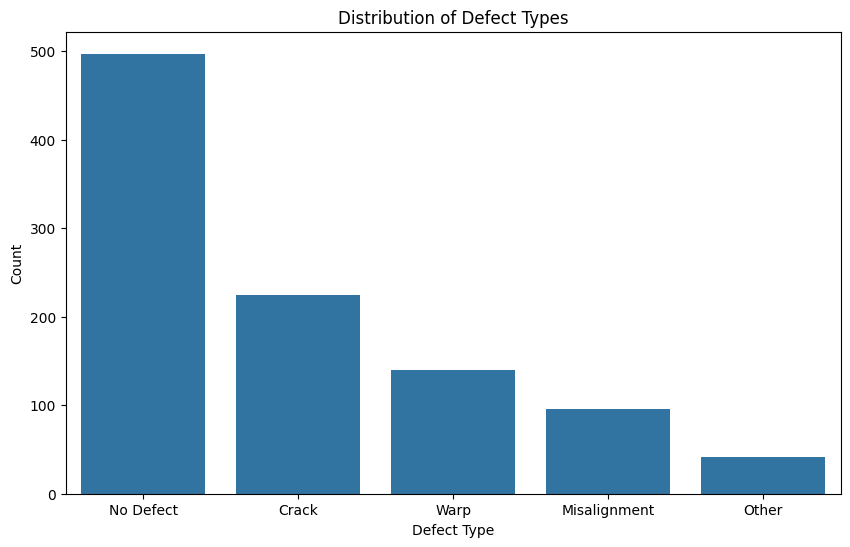

In [5]:
# Distribution of defects
plt.figure(figsize=(10, 6))
sns.countplot(x='Defect_Type', data=data, order=data['Defect_Type'].value_counts().index)
plt.title('Distribution of Defect Types')
plt.xlabel('Defect Type')
plt.ylabel('Count')
plt.show()


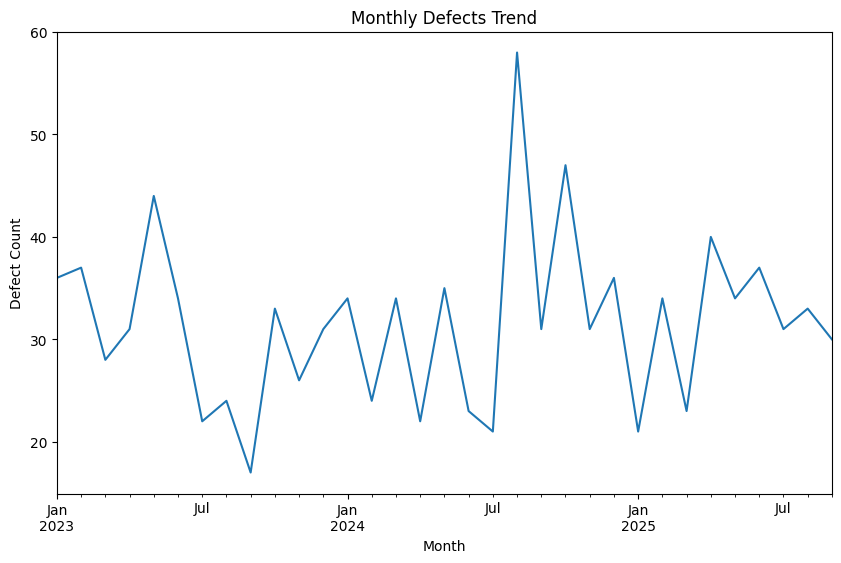

In [6]:
# Trend of defects over time
monthly_defects = data.groupby(data['Production_Date'].dt.to_period('M'))['Defect_Count'].sum()
monthly_defects.plot(kind='line', figsize=(10, 6), title='Monthly Defects Trend')
plt.xlabel('Month')
plt.ylabel('Defect Count')
plt.show()


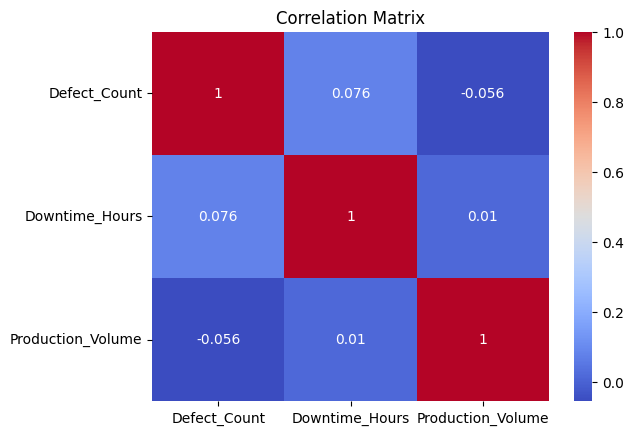

In [7]:
# Correlation analysis
corr = data[['Defect_Count', 'Downtime_Hours', 'Production_Volume']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


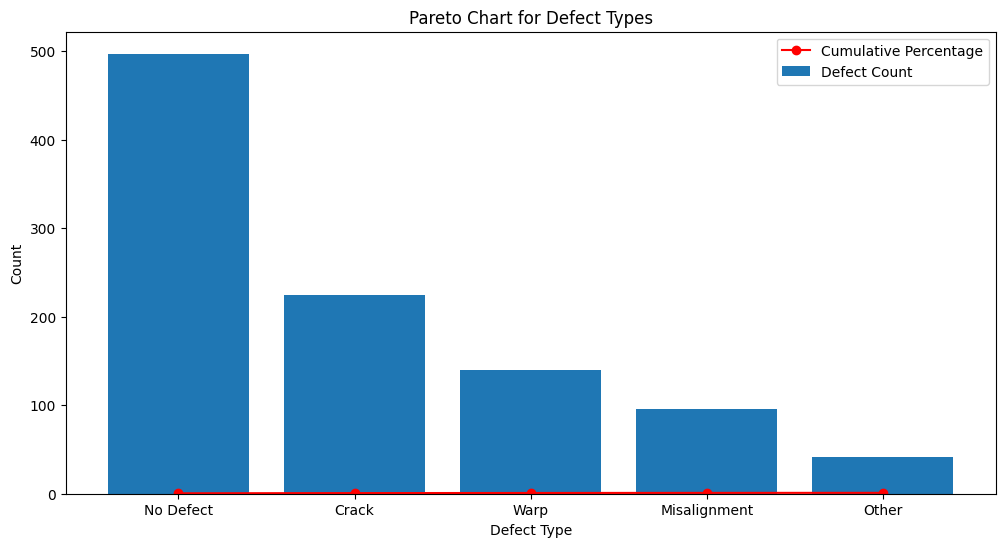

In [8]:
# Pareto Chart for Defect Types
defects_count = data['Defect_Type'].value_counts()
pareto_chart = defects_count.cumsum() / defects_count.sum()

plt.figure(figsize=(12, 6))
plt.bar(defects_count.index, defects_count, label='Defect Count')
plt.plot(defects_count.index, pareto_chart, color='red', marker='o', label='Cumulative Percentage')
plt.title('Pareto Chart for Defect Types')
plt.ylabel('Count')
plt.xlabel('Defect Type')
plt.legend()
plt.show()



In [9]:
# Hypothesis testing - Does downtime affect defect count?
from scipy.stats import ttest_ind

# High and low downtime groups
high_downtime = data[data['Downtime_Hours'] > data['Downtime_Hours'].median()]['Defect_Count']
low_downtime = data[data['Downtime_Hours'] <= data['Downtime_Hours'].median()]['Defect_Count']

t_stat, p_val = ttest_ind(high_downtime, low_downtime)
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

T-Statistic: 1.0003904229035128, P-Value: 0.3173640924133718


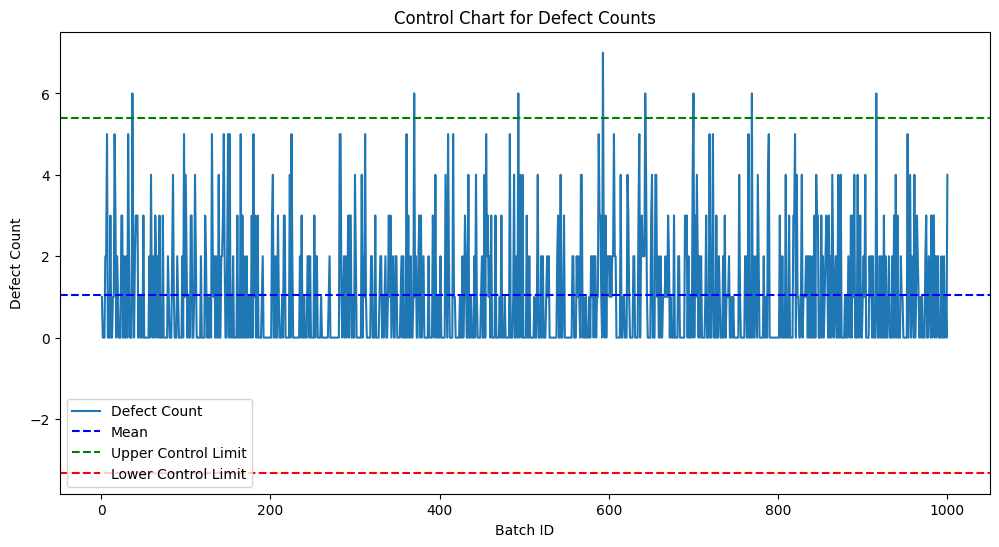

In [10]:
# Control chart for defect counts
data['Mean_Defect'] = data['Defect_Count'].mean()
data['UCL'] = data['Defect_Count'].mean() + 3 * data['Defect_Count'].std()
data['LCL'] = data['Defect_Count'].mean() - 3 * data['Defect_Count'].std()

plt.figure(figsize=(12, 6))
plt.plot(data['Batch_ID'], data['Defect_Count'], label='Defect Count')
plt.axhline(y=data['Mean_Defect'].mean(), color='blue', linestyle='--', label='Mean')
plt.axhline(y=data['UCL'].mean(), color='green', linestyle='--', label='Upper Control Limit')
plt.axhline(y=data['LCL'].mean(), color='red', linestyle='--', label='Lower Control Limit')
plt.title('Control Chart for Defect Counts')
plt.xlabel('Batch ID')
plt.ylabel('Defect Count')
plt.legend()
plt.show()
